# Exit Signals: Understanding Employee Resignations in the Austrailian Education System

### Purpose of the Project

To showcase more advanced data cleaning techniques using the `pandas` Python library. Focus is placed on:

>* Pandas Vectorized String Methods (e.g., `s.str.get()`, `s.str.replace()`)
>
>* Methods to transform and reshape dataframes, including the `pd.concat` function to stack dataframes
>
>* Data aggregation methods, including `df.pivot_table()`
>
>* More advanced missing and duplicate data handling - making use of **regular expressions**, `s.map()` and `s.apply()` methods clean and reformat columns

### Project Background and Goals

This project involves preparing and analysing employee exit surveys gathered by the [Department of Education, Training and Employment (DETE)](https://en.wikipedia.org/wiki/Department_of_Education_(Queensland)) and the [Technical and Further Education (TAFE)](https://en.wikipedia.org/wiki/Technical_and_further_education) bodies of the Queensland Government based in Austrailia.

For this work, we will aim to provide the following information for stakeholders:

>* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
>
>* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

---

### About the Datasets

The links to the original surveys are no longer available from their [original source](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey), so the data was instead sourced from [Dataquest](https://www.dataquest.io).

The original source did not provide a `data dictionary`, so instead we will have to infer their meanings as best we can.

>**Important notes:**
>
>* The final report will combine data from *both* datasets to answer the posed questions. 
>
>* Although both surveys use the same underlying template, one of the surveys modified many of the response fields. We will need to do a large amount of cleaning prior to analysis to ensure the datasets are consistent such that the data can be combined.

Some of the fields planned to be used in our analysis include:

**DETE Survey**

| Column name                             | Description                                                         |
|-----------------------------------------|---------------------------------------------------------------------|
| ID                                      | An identifier for the participant of the survey                     |
| SeparationType                          | The reason why employment ceased                                    |
| Cease Date                              | The month/year (MM/YYYY) when the individual's employment ended     |
| DETE Start Date                         | The year the individual began employment with DETE                  |

**TAFE Survey**

| Column name                             | Description                                                         |
|-----------------------------------------|---------------------------------------------------------------------|
| Record ID                               | An identifier for the participant of the survey                     |
| Reason for ceasing employment           | The reason why employment ceased                                    |
| LengthOfServiceOverall                  | Overall length of service at institute (in years)                   |


## Preparing the Workbook

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme()

pd.options.display.max_rows = 100 # increase the maximum number of rows/columns that render in the output
pd.options.display.max_columns = 150

## Reading in the Datasets

In [2]:
dete_survey = pd.read_csv("dete_survey.csv")

tafe_survey = pd.read_csv("tafe_survey.csv")

In [3]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [5]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [6]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [7]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [8]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

#### Remarks on the status of the raw datasets

We can make a number of observations:

>* The `dete_survey` contains "Not Stated" for many of the values to indicate missing values. These would be better represented by NaN values.
>
>* Both the DETE and TAFE surveys contain many columns that are unnecessary (and confusing) for our purposes. These can be dropped.
>
>* Column names for fields that share the same type of data (e.g., Cease Date) do not have consistent names between the two dataframes.
>
>* There are multiple response columns indicating an employee resigned due to dissatisfaction. 

## Missing Value Identification and Dropping Unnecessary Columns

In [9]:
dete_survey = pd.read_csv("dete_survey.csv", na_values=["Not Stated"]) # read the dete survey file again, replacing "not stated" with NaN

dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [10]:
dete_survey.columns[28:49]

Index(['Professional Development', 'Opportunities for promotion',
       'Staff morale', 'Workplace issue', 'Physical environment',
       'Worklife balance', 'Stress and pressure support',
       'Performance of supervisor', 'Peer support', 'Initiative', 'Skills',
       'Coach', 'Career Aspirations', 'Feedback', 'Further PD',
       'Communication', 'My say', 'Information', 'Kept informed',
       'Wellness programs', 'Health & Safety'],
      dtype='object')

In [11]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1) # drop agree/disagree survey question columns: "Professional Development" through "Health & Safety"

dete_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [12]:
tafe_survey.columns[17:66]

Index(['Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal development',
       'InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%',
       'InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had',
       'InstituteViews. Topic:6. The organisation recognised when staff did good work',
       'InstituteViews. Topic:7. Management was generally supportive of me',
       'InstituteViews. Topic:8. Management was generally supportive of my team',
       'InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me',
       'InstituteViews. Topic:10. Staff morale was positive w

In [13]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1) # drop unhelpful columns: "Main factor" through "Would you recommend institute?"

tafe_survey_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


We decide to drop the columns shown above since our analysis is more concerned with a **less granular** perspective of employee dissatisfaction trends - we are more concerned with the bigger picture rather than fine detail. 

Many of the columns are also not entirely relevant to our aims and clutter the dataframes.

## Standardizing Column Names

Since we intend to merge the two dataframes, we must ensure all column names are in a consistent format such that fields containing the same type of information (e.g., ages, genders, start dates) are combined correctly.

In [14]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [15]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.strip().str.lower()

dete_survey_updated.rename({"separationtype":"separation_type"}, axis=1, inplace=True)

dete_survey_updated.columns

Index(['id', 'separation_type', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [16]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

In [17]:
tafe_survey_updated.rename({"Record ID": "id", "CESSATION YEAR": "cease_date", "Reason for ceasing employment": "separation_type", "Gender. What is your Gender?": "gender", "CurrentAge. Current Age": "age", "Employment Type. Employment Type": "employment_status", "Classification. Classification": "position", "LengthofServiceOverall. Overall Length of Service at Institute (in years)": "institute_service","LengthofServiceCurrent. Length of Service at current workplace (in years)": "role_service"}, axis=1, inplace=True)

tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separation_type',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [18]:
dete_survey_updated.head()

,id,separation_type,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [19]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separation_type,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


The other columns that do not fit the "snake_case" format in the `tafe_survey` dataframe can be addressed later.

## Filtering the Resignation Records

Since we are aiming to answer questions related to employees who decide to resign from their position, we can remove all records that have `separation_type` fields that do not contain "Resignation":

In [20]:
dete_survey_updated["separation_type"].value_counts()

separation_type
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: count, dtype: int64

In [21]:
dete_resignations = dete_survey_updated.copy()

dete_resignations = dete_survey_updated[dete_survey_updated["separation_type"].str.split("-").str[0] == "Resignation"].copy() # select only the records where the separation type is resignation

dete_resignations["separation_type"] = dete_resignations["separation_type"].str.split("-").str[0] # rename all resignation types to "Resignation"

dete_resignations["separation_type"].value_counts()

separation_type
Resignation    311
Name: count, dtype: int64

From the DETE survey, there are 311 resignation records that contribute to our sample of resignation data.

In [22]:
tafe_survey_updated["separation_type"].value_counts()

separation_type
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: count, dtype: int64

In [23]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separation_type"].str.contains("Resignation", na=False)]

tafe_resignations["separation_type"].value_counts()

separation_type
Resignation    340
Name: count, dtype: int64

The TAFE survey provides an additional 340 resignation records.

## Verifying the Resignation Data

Below, we clean and explore the `cease_date` and `dete_start_date` columns to ensure all years are logically correct:

* Since cease date is the last year of a person's employment and the start date is the first year, there cannot be cease dates earlier than the earliest start date.

* Since most people in the teaching field begin in their 20s, we should **not** expect many start dates before the 1940s.

In [24]:
dete_resignations["cease_date"].value_counts()

cease_date
2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2012      1
09/2010      1
07/2006      1
Name: count, dtype: int64

In [25]:
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.split("/").str[-1] # extract the only the year from the cease date

dete_resignations["cease_date"] = dete_resignations["cease_date"].astype(float) # store as a float for analysis

dete_resignations["cease_date"].value_counts()

cease_date
2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: count, dtype: int64

In [26]:
dete_resignations["dete_start_date"].value_counts().sort_index(ascending=False)

dete_start_date
2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: count, dtype: int64

In [27]:
tafe_resignations["cease_date"].value_counts().sort_index(ascending=False)

cease_date
2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: count, dtype: int64

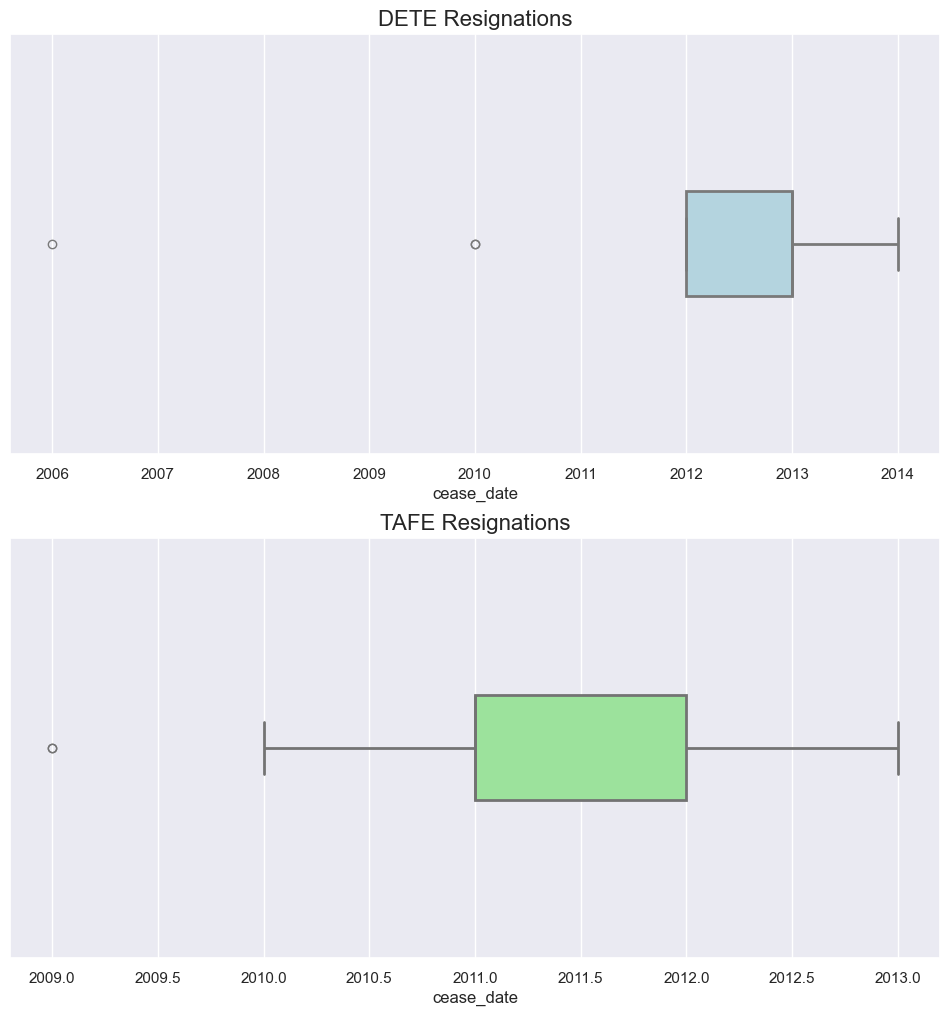

In [28]:
plt.figure(figsize=(12,12))

plt.subplot(2,1,1)

plt.title("DETE Resignations", fontsize=16)

sns.boxplot(data=dete_resignations, x="cease_date", width=0.25, color="lightblue", saturation=0.75, linewidth=2)

plt.subplot(2,1,2)

plt.title("TAFE Resignations", fontsize=16)

sns.boxplot(data=tafe_resignations, x="cease_date", width=0.25, color="lightgreen", saturation=0.75, linewidth=2)

plt.show()

The cease_dates across the two datasets do not completely align. This is expected since these are surveys taken by two different organisations which have a different number of employees resigning at different times. Since we are not concerned with aggregating by year, we can leave these as is.

The cease dates all look to be in order, there are no dates greater than 2014 across either dataset and the DETE start dates all fall within a reasonable range.

## Creating an Institute Service Column for the DETE Dataset

Since we are concerned with answering the question below, we need a field in both datasets to describe how long each employee has spent in the workplace.

>* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

The TAFE survey contains the `institute_service` column. 

The same column for the DETE survey can be added by subtracting the start date from the cease date:


In [29]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]

dete_resignations[["dete_start_date", "cease_date", "institute_service"]].head()

,dete_start_date,cease_date,institute_service
3,2005.0,2012.0,7.0
5,1994.0,2012.0,18.0
8,2009.0,2012.0,3.0
9,1997.0,2012.0,15.0
11,2009.0,2012.0,3.0


## Identifying Dissatisfied Resigning Employees

We now move to identifying employees who resigned because of some dissatisfaction. The two datasets have different fields to indicate dissatisfaction:

**TAFE:**

* `Contributing Factors. Dissatisfaction`

* `Contributing Factors. Job Dissatisfaction`

**DETE:**

* `job_dissatisfaction`

* `dissatisfaction_with_the_department`

* `physical_work_environment`

* `lack_of_recognition`

* `lack_of_job_security`

* `work_location`

* `employment_conditons`

* `work_life_balance`

* `workload`

If an employee provided an indication in any of the fields above as a factor contributing to their resignation, we can identify them as `dissatisfied` and assign this to a new column. 

The `dissatisfied` column should only contain:

* True

* False

* NaN (data missing)

In [30]:
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts()

Contributing Factors. Dissatisfaction
-                                         277
Contributing Factors. Dissatisfaction      55
Name: count, dtype: int64

In [31]:
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts()

Contributing Factors. Job Dissatisfaction
-                      270
Job Dissatisfaction     62
Name: count, dtype: int64

We can see the TAFE survey dataset uses "-" to indicate a False reading and the column name to indicate a True value for the field.

To create a `dissatisfied` column with this knowledge, we can define a function `update_val` which will take each element within a series and return either True, False or np.nan. 

This function is mapped onto each column to convert both columns to boolean arrays (with missing values stored as NaN). The `df.any()` method is used below to set the resultant dissatisfied value in the new column to either True/False/NaN by evaluating the values in both the `Contributing Factors. Dissatisfaction` and `Contributing Factors. Job Dissatisfaction` columns. If either contains True, the `dissatisfied` column is assigned to True.

In [32]:
def update_val(element):
  
  if element == "-":
    return False
  
  elif pd.isnull(element):
    return np.nan
  
  else:
    return True
  
tafe_resignations_updated = tafe_resignations.copy()

tafe_resignations_updated["dissatisfied"] = tafe_resignations[["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]].map(update_val).any(axis=1) 
# True if either column is True

tafe_resignations_updated = tafe_resignations_updated.drop(["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"], axis=1)

tafe_resignations_updated[["id", "Institute", "WorkArea", "cease_date", "separation_type", "dissatisfied"]].head()

,id,Institute,WorkArea,cease_date,separation_type,dissatisfied
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,False
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,False
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,False
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,False


In [33]:
tafe_resignations_updated["dissatisfied"].value_counts(dropna=False)

dissatisfied
False    249
True      91
Name: count, dtype: int64

We then repeat for the DETE dataset:

In [34]:
dete_resignations[["job_dissatisfaction", "dissatisfaction_with_the_department", "physical_work_environment", "lack_of_recognition", "lack_of_job_security", "work_location", "employment_conditions", "work_life_balance", "workload"]].value_counts(dropna=False)

job_dissatisfaction  dissatisfaction_with_the_department  physical_work_environment  lack_of_recognition  lack_of_job_security  work_location  employment_conditions  work_life_balance  workload
False                False                                False                      False                False                 False          False                  False              False       162
                                                                                                                                                                      True               False        39
                                                                                                                                True           False                  False              False         8
                                                                                     True                 False                 False          False                  False              False         8
Tr

The DETE columns are already in the desired format.

In [35]:
dete_resignations_updated = dete_resignations.copy()

dete_resignations_updated["dissatisfied"] = dete_resignations_updated[["job_dissatisfaction", "dissatisfaction_with_the_department", "physical_work_environment", "lack_of_recognition", "lack_of_job_security", "work_location", "employment_conditions", "work_life_balance", "workload"]].any(axis=1, skipna=False) 

dete_resignations_updated["dissatisfied"].value_counts(dropna=False)

dissatisfied
False    162
True     149
Name: count, dtype: int64

## Combining the Datasets

Prior to concatenating the datasets, we do some final preparations: 

* Dropping more redundant/unnecessary columns

* Adding an `insitute` column to label each record so we know from which dataset the record originated

* Reordering columns and verifying all column names are standardized

In [36]:
dete_resignations_updated["institute"] = "DETE"

dete_resignations_updated.drop(dete_resignations_updated.columns[10:28], axis=1, inplace=True)

dete_resignations_updated.drop(dete_resignations_updated.columns[12:17], axis=1, inplace=True)

dete_resignations_updated = dete_resignations_updated[["id", "institute", "separation_type", "dissatisfied", "dete_start_date", "role_start_date", "cease_date", "institute_service", "gender", "age", "position", "classification", "region", "business_unit", "employment_status"]]

dete_resignations_updated.head()

,id,institute,separation_type,dissatisfied,dete_start_date,role_start_date,cease_date,institute_service,gender,age,position,classification,region,business_unit,employment_status
3,4,DETE,Resignation,False,2005.0,2006.0,2012.0,7.0,Female,36-40,Teacher,Primary,Central Queensland,NaN,Permanent Full-time
5,6,DETE,Resignation,True,1994.0,1997.0,2012.0,18.0,Female,41-45,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time
8,9,DETE,Resignation,False,2009.0,2009.0,2012.0,3.0,Female,31-35,Teacher,Secondary,North Queensland,NaN,Permanent Full-time
9,10,DETE,Resignation,True,1997.0,2008.0,2012.0,15.0,Female,46-50,Teacher Aide,NaN,NaN,NaN,Permanent Part-time
11,12,DETE,Resignation,False,2009.0,2009.0,2012.0,3.0,Male,31-35,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time


In [37]:
tafe_resignations_updated.rename({"Institute": "institute", "WorkArea": "work_area"}, axis=1, inplace=True)

tafe_resignations_updated["institute"] = "TAFE"

tafe_resignations_updated.drop(tafe_resignations_updated.columns[5:15], axis=1, inplace=True)

tafe_resignations_updated.drop(tafe_resignations_updated.columns[2], axis=1, inplace=True)

tafe_resignations_updated.drop(tafe_resignations_updated.columns[9], axis=1, inplace=True)

tafe_resignations_updated = tafe_resignations_updated[["id", "institute", "separation_type", "dissatisfied", "cease_date", "institute_service", "gender", "age", "position", "employment_status"]]

tafe_resignations_updated.head()

,id,institute,separation_type,dissatisfied,cease_date,institute_service,gender,age,position,employment_status
3,6.341399e+17,TAFE,Resignation,False,2010.0,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,TAFE,Resignation,False,2010.0,3-4,Male,41 45,Teacher (including LVT),Permanent Full-time
5,6.341475e+17,TAFE,Resignation,False,2010.0,7-10,Female,56 or older,Teacher (including LVT),Contract/casual
6,6.341520e+17,TAFE,Resignation,False,2010.0,3-4,Male,20 or younger,Administration (AO),Temporary Full-time
7,6.341537e+17,TAFE,Resignation,False,2010.0,3-4,Male,46 50,Teacher (including LVT),Permanent Full-time


### Concatenating the DataFrames

In [38]:
combined = pd.concat([dete_resignations_updated, tafe_resignations_updated], ignore_index=True)

combined

,id,institute,separation_type,dissatisfied,dete_start_date,role_start_date,cease_date,institute_service,gender,age,position,classification,region,business_unit,employment_status
0,4.000000e+00,DETE,Resignation,False,2005.0,2006.0,2012.0,7.0,Female,36-40,Teacher,Primary,Central Queensland,NaN,Permanent Full-time
1,6.000000e+00,DETE,Resignation,True,1994.0,1997.0,2012.0,18.0,Female,41-45,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time
2,9.000000e+00,DETE,Resignation,False,2009.0,2009.0,2012.0,3.0,Female,31-35,Teacher,Secondary,North Queensland,NaN,Permanent Full-time
3,1.000000e+01,DETE,Resignation,True,1997.0,2008.0,2012.0,15.0,Female,46-50,Teacher Aide,NaN,NaN,NaN,Permanent Part-time
4,1.200000e+01,DETE,Resignation,False,2009.0,2009.0,2012.0,3.0,Male,31-35,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,6.350660e+17,TAFE,Resignation,False,NaN,NaN,2013.0,5-6,Male,21 25,Operational (OO),NaN,NaN,NaN,Temporary Full-time
647,6.350668e+17,TAFE,Resignation,False,NaN,NaN,2013.0,1-2,Male,51-55,Teacher (including LVT),NaN,NaN,NaN,Temporary Full-time
648,6.350677e+17,TAFE,Resignation,False,NaN,NaN,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
649,6.350704e+17,TAFE,Resignation,False,NaN,NaN,2013.0,5-6,Female,51-55,Teacher (including LVT),NaN,NaN,NaN,Permanent Full-time


## Visualizing Missing Data in the Combined DataFrame

In [39]:
combined.notnull().sum().sort_values(ascending=False)

id                   651
institute            651
separation_type      651
dissatisfied         651
cease_date           635
position             598
employment_status    597
age                  596
gender               592
institute_service    563
dete_start_date      283
role_start_date      271
region               265
classification       161
business_unit         32
dtype: int64

We can safely discard all columns with less than 500 not null values since these fields are not necessary for our analysis.

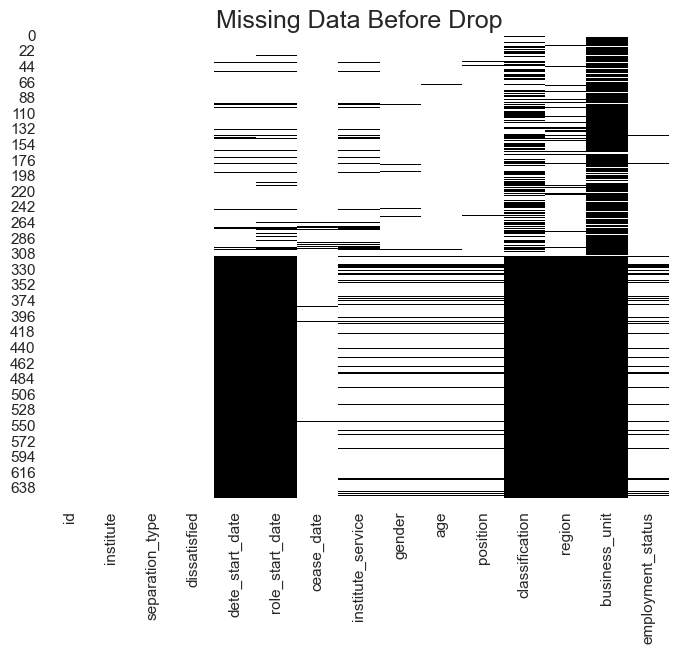

In [40]:
plt.figure(figsize=(8,6))

plt.subplot(1,1,1)
plt.title("Missing Data Before Drop", fontsize=18)
sns.heatmap(combined.isnull(), cmap='gray_r', cbar=False) # black corresponds to missing values

plt.show()

In [41]:
combined.dropna(thresh=500, axis=1, inplace=True) # drop columns with less than 500 non-missing values

In [42]:
combined.notnull().sum().sort_values(ascending=False)

id                   651
institute            651
separation_type      651
dissatisfied         651
cease_date           635
position             598
employment_status    597
age                  596
gender               592
institute_service    563
dtype: int64

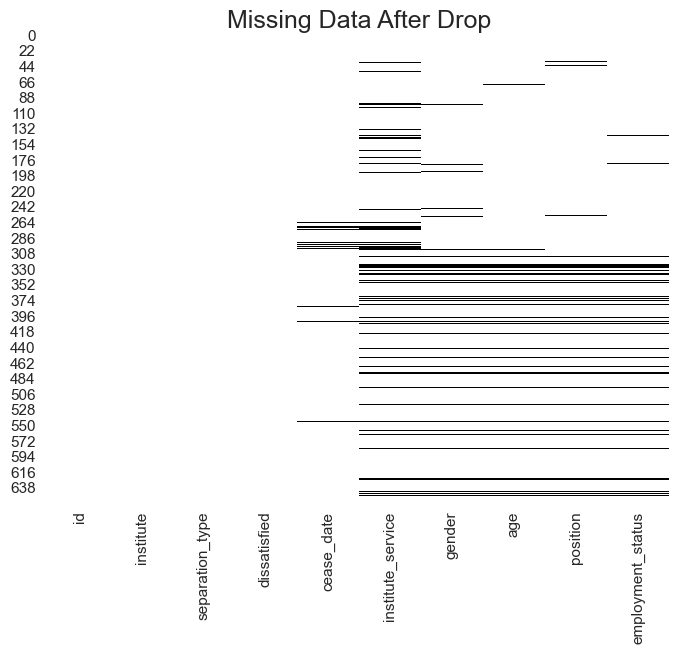

In [43]:
plt.figure(figsize=(8,6))

plt.subplot(1,1,1)
plt.title("Missing Data After Drop", fontsize=18)
sns.heatmap(combined.isnull(), cmap='gray_r', cbar=False) # black corresponds to missing values

plt.show()

In [44]:
combined

,id,institute,separation_type,dissatisfied,cease_date,institute_service,gender,age,position,employment_status
0,4.000000e+00,DETE,Resignation,False,2012.0,7.0,Female,36-40,Teacher,Permanent Full-time
1,6.000000e+00,DETE,Resignation,True,2012.0,18.0,Female,41-45,Guidance Officer,Permanent Full-time
2,9.000000e+00,DETE,Resignation,False,2012.0,3.0,Female,31-35,Teacher,Permanent Full-time
3,1.000000e+01,DETE,Resignation,True,2012.0,15.0,Female,46-50,Teacher Aide,Permanent Part-time
4,1.200000e+01,DETE,Resignation,False,2012.0,3.0,Male,31-35,Teacher,Permanent Full-time
...,...,...,...,...,...,...,...,...,...,...
646,6.350660e+17,TAFE,Resignation,False,2013.0,5-6,Male,21 25,Operational (OO),Temporary Full-time
647,6.350668e+17,TAFE,Resignation,False,2013.0,1-2,Male,51-55,Teacher (including LVT),Temporary Full-time
648,6.350677e+17,TAFE,Resignation,False,2013.0,NaN,NaN,NaN,NaN,NaN
649,6.350704e+17,TAFE,Resignation,False,2013.0,5-6,Female,51-55,Teacher (including LVT),Permanent Full-time


From the above heatmap, we still see some columns important to our analysis still contain missing values. 

The `institute_service` field is particularly important and it contains 88 missing values. Not only this, but it also contains data stored in a number of formats. This will need to be addressed.

In [45]:
combined["institute_service"].value_counts(dropna=False)

institute_service
NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
17.0                   6
14.0                   6
22.0                   6
12.0                   6
10.0                   6
16.0                   5
18.0                   5
23.0                   4
24.0                   4
11.0                   4
39.0                   3
19.0                   3
32.0                   3
21.0                   3
25.0                   2
36.0                   2
30.0                   2
26.0                   2
28.0   

### Preparing the `institute_service` Column

In [46]:
combined["institute_service"].unique().shape

(50,)

There are 50 unique values in the `institute_service` column. To make our analysis simpler, we can categorise the values according to the following plan:

* New employees: Less than 3 years at the company

* Experienced: 3-6 years at the company

* Established: 7-10 years at the company

* Veteran: 11+ years at the company

Before we are able to begin categorising, we must get the column into a state where only the years of service are present, stored as a float. 

To do this, we first convert the `institute_service` column to a string, utilising the `Series.str.extract()` vectorized string method to capture all numbers contained within each cell. A **[Regular Expression](https://www.w3schools.com/python/python_regex.asp)** (aka **RegEx**) is used to accomplish this. 

In [47]:
combined["institute_service"] = combined["institute_service"].astype(str)

combined["institute_service"] = combined["institute_service"].str.extract(r"(\d+)") # uses RegEx to extract one or more occurences of digits from the institute_service column

combined["institute_service"] = combined["institute_service"].astype(float)

combined["institute_service"].value_counts(dropna=False)

institute_service
1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
6.0      17
20.0     17
4.0      16
2.0      14
9.0      14
8.0       8
13.0      8
15.0      7
14.0      6
17.0      6
10.0      6
22.0      6
12.0      6
16.0      5
18.0      5
23.0      4
24.0      4
19.0      3
32.0      3
39.0      3
21.0      3
30.0      2
26.0      2
36.0      2
25.0      2
28.0      2
35.0      1
38.0      1
49.0      1
33.0      1
27.0      1
41.0      1
42.0      1
29.0      1
34.0      1
31.0      1
Name: count, dtype: int64

After successfully cleaning the column, we then define a mapping function that can be used on the cleaned `institute_service` column to categorise each record based on the employee's service years. The category each record is assigned is added to a new column: `career_stage`.

In [48]:
def career_stage(element):
  
  if pd.isnull(element):
    
    return np.nan
  
  elif element < 3:
    
    return "New"
  
  elif 3 <= element <= 6:
    
    return "Experienced"
  
  elif 7 <= element <= 10:
    
    return "Established"
  
  else:
    
    return "Veteran"
  
combined["career_stage"] = combined["institute_service"].map(career_stage)

In [49]:
combined["career_stage"].value_counts(dropna=False)

career_stage
New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: count, dtype: int64

In [50]:
combined

,id,institute,separation_type,dissatisfied,cease_date,institute_service,gender,age,position,employment_status,career_stage
0,4.000000e+00,DETE,Resignation,False,2012.0,7.0,Female,36-40,Teacher,Permanent Full-time,Established
1,6.000000e+00,DETE,Resignation,True,2012.0,18.0,Female,41-45,Guidance Officer,Permanent Full-time,Veteran
2,9.000000e+00,DETE,Resignation,False,2012.0,3.0,Female,31-35,Teacher,Permanent Full-time,Experienced
3,1.000000e+01,DETE,Resignation,True,2012.0,15.0,Female,46-50,Teacher Aide,Permanent Part-time,Veteran
4,1.200000e+01,DETE,Resignation,False,2012.0,3.0,Male,31-35,Teacher,Permanent Full-time,Experienced
...,...,...,...,...,...,...,...,...,...,...,...
646,6.350660e+17,TAFE,Resignation,False,2013.0,5.0,Male,21 25,Operational (OO),Temporary Full-time,Experienced
647,6.350668e+17,TAFE,Resignation,False,2013.0,1.0,Male,51-55,Teacher (including LVT),Temporary Full-time,New
648,6.350677e+17,TAFE,Resignation,False,2013.0,NaN,NaN,NaN,NaN,NaN,NaN
649,6.350704e+17,TAFE,Resignation,False,2013.0,5.0,Female,51-55,Teacher (including LVT),Permanent Full-time,Experienced


### Preparing the `age` Column

The `age` column is in a similar state to the `institute_service` column, containing 55 null values and stored in an inconsistent format.

We can categorise the values into age group by decade to help with analysis:

* 20s
* 30s
* 40s
* 50s
* 60+

In [51]:
combined["age"].value_counts(dropna=False)

age
51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
21-25            29
31-35            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: count, dtype: int64

For datapoints that span a range (e.g., 41-45) we will take the minimum value in the specified range, 41 in this case.

In [52]:
combined["age"] = combined["age"].astype(str)

combined["age"] = combined["age"].str.extract(r"(\d+)")

combined["age"] = combined["age"].astype(float)

combined["age"].value_counts(dropna=False)

age
41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
NaN     55
56.0    55
61.0    23
20.0    10
Name: count, dtype: int64

We define another mapping function to create an `age_group` column, assigning each resigning employee to their respective decade based on their age column.

In [53]:
def age_group(element):
  
  if pd.isnull(element):
    
    return np.nan
  
  elif 20 <=element < 30:
    
    return "20s"
  
  elif 30 <= element < 40:
    
    return "30s"
  
  elif 40 <= element < 50:
    
    return "40s"
  
  elif 50 <= element < 60:
    
    return "50s"
  
  else:
    
    return "60+"

combined["age_group"] = combined["age"].map(age_group)

In [54]:
combined

,id,institute,separation_type,dissatisfied,cease_date,institute_service,gender,age,position,employment_status,career_stage,age_group
0,4.000000e+00,DETE,Resignation,False,2012.0,7.0,Female,36.0,Teacher,Permanent Full-time,Established,30s
1,6.000000e+00,DETE,Resignation,True,2012.0,18.0,Female,41.0,Guidance Officer,Permanent Full-time,Veteran,40s
2,9.000000e+00,DETE,Resignation,False,2012.0,3.0,Female,31.0,Teacher,Permanent Full-time,Experienced,30s
3,1.000000e+01,DETE,Resignation,True,2012.0,15.0,Female,46.0,Teacher Aide,Permanent Part-time,Veteran,40s
4,1.200000e+01,DETE,Resignation,False,2012.0,3.0,Male,31.0,Teacher,Permanent Full-time,Experienced,30s
...,...,...,...,...,...,...,...,...,...,...,...,...
646,6.350660e+17,TAFE,Resignation,False,2013.0,5.0,Male,21.0,Operational (OO),Temporary Full-time,Experienced,20s
647,6.350668e+17,TAFE,Resignation,False,2013.0,1.0,Male,51.0,Teacher (including LVT),Temporary Full-time,New,50s
648,6.350677e+17,TAFE,Resignation,False,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
649,6.350704e+17,TAFE,Resignation,False,2013.0,5.0,Female,51.0,Teacher (including LVT),Permanent Full-time,Experienced,50s


## Handling Missing Values in the `age` and `institute_service` Columns

As mentioned above, the `institute_service` and `age` columns have 88 and 55 null values respectively. We can impute some of these with *reasonable* estimates based on the available data we do have.

We can turn to the mean institute service values aggregated by age group from the available data. 

**If the age group of the employee is known**, these records with null institute service values can be imputed with the mean of the employees age group (rounded to the nearest integer).

In [55]:
combined.pivot_table(index="age_group", values="institute_service", margins=True)

,institute_service
age_group,
20s,2.712121
30s,4.844961
40s,7.376543
50s,11.333333
60+,23.777778
All,7.069519


In [56]:
def transform_institute(element):
  
  if pd.isnull(element):
      
    return np.nan
    
  if element == "20s":
      
    return 2.0
    
  elif element == "30s":
      
    return 4.0
    
  elif element == "40s":
      
    return 7.0
    
  elif element == "50s":
      
    return 11.0
    
  elif element == "60+":
      
    return 23.0

imputed_values = combined[combined["institute_service"].isnull()]["age_group"].map(transform_institute)

combined["institute_service"] = combined["institute_service"].fillna(imputed_values)

We define another function above to carry out the cleaning. The series containing the imputed values is stored and passed to the `.fillna()` method to update the NaN values with the appropriate imputed value.

In [57]:
combined["institute_service"].value_counts(dropna=False)

institute_service
1.0     159
3.0      83
5.0      56
NaN      53
7.0      46
11.0     36
4.0      21
2.0      21
0.0      20
6.0      17
20.0     17
9.0      14
23.0      9
13.0      8
8.0       8
15.0      7
17.0      6
14.0      6
10.0      6
12.0      6
22.0      6
16.0      5
18.0      5
24.0      4
19.0      3
32.0      3
39.0      3
21.0      3
30.0      2
26.0      2
36.0      2
28.0      2
25.0      2
38.0      1
35.0      1
33.0      1
49.0      1
27.0      1
41.0      1
42.0      1
29.0      1
34.0      1
31.0      1
Name: count, dtype: int64

This has filled 35 of the missing `institute_service` values with reasonable estimates.

In [58]:
combined["career_stage"] = combined["institute_service"].map(career_stage) # rerun to update the career_stage column

### Records Omitted From Analysis

The remaining 53 null values cannot be reliably imputed since we do not have sufficient information for these employees - no `age` or `institute_service` data exists, so we cannot estimate one from the other.

In [59]:
missing_career_stage = combined[combined["career_stage"].isnull()]

missing_career_stage

,id,institute,separation_type,dissatisfied,cease_date,institute_service,gender,age,position,employment_status,career_stage,age_group
141,4.060000e+02,DETE,Resignation,False,2012.0,NaN,NaN,NaN,Teacher,NaN,NaN,NaN
301,8.040000e+02,DETE,Resignation,False,2013.0,NaN,NaN,NaN,Teacher Aide,Permanent Part-time,NaN,NaN
310,8.230000e+02,DETE,Resignation,False,2013.0,NaN,NaN,NaN,Teacher Aide,NaN,NaN,NaN
311,6.341399e+17,TAFE,Resignation,False,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
322,6.341770e+17,TAFE,Resignation,False,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
324,6.341779e+17,TAFE,Resignation,False,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325,6.341820e+17,TAFE,Resignation,False,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
326,6.341821e+17,TAFE,Resignation,True,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327,6.341831e+17,TAFE,Resignation,False,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331,6.341934e+17,TAFE,Resignation,True,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


>Interestingly, 50 of these incomplete records originated from the TAFE survey.
>
>Since there is no accurate way to impute an estimate for what these missing values should be, we have to drop these records from the analysis (leave them as is since NaN values are excluded by default).

---

## Initial Analysis

### Satisfied vs. Dissatisfied Resigning Employees

In [60]:
combined["dissatisfied"].value_counts(dropna=False)

dissatisfied
False    411
True     240
Name: count, dtype: int64

Of the 651 resigning employees collected from the DETE and TAFE surveys, `36.9%` indicated they were dissatisfied (by indicating dissatisfaction in one of the many survey questions).

#### Aggregating by Career Stage

In [61]:
combined["career_stage"].value_counts(dropna=False)

career_stage
New            200
Experienced    177
Veteran        147
Established     74
NaN             53
Name: count, dtype: int64

New and Experienced employees make up the largest contribution to the total number of resigning employees.

We determine the proportion of resigning employees who are satisfied vs. dissatisfied. 

Since the `dissatisfied` column is a boolean series, the result of passing this column as the values parameter is to return the proportion of True vs. False values.

In [62]:
satisfaction_proportion_by_career_stage = combined.pivot_table(index="career_stage", values="dissatisfied", margins=True, aggfunc="mean")

satisfaction_proportion_by_career_stage["satisfied"] = 1 - satisfaction_proportion_by_career_stage["dissatisfied"] # calculate the proportion of satisfied employees

satisfaction_proportion_by_career_stage

,dissatisfied,satisfied
career_stage,,
Established,0.459459,0.540541
Experienced,0.338983,0.661017
New,0.305000,0.695000
Veteran,0.482993,0.517007
All,0.377926,0.622074


Plotting the data as a stacked bar chart:

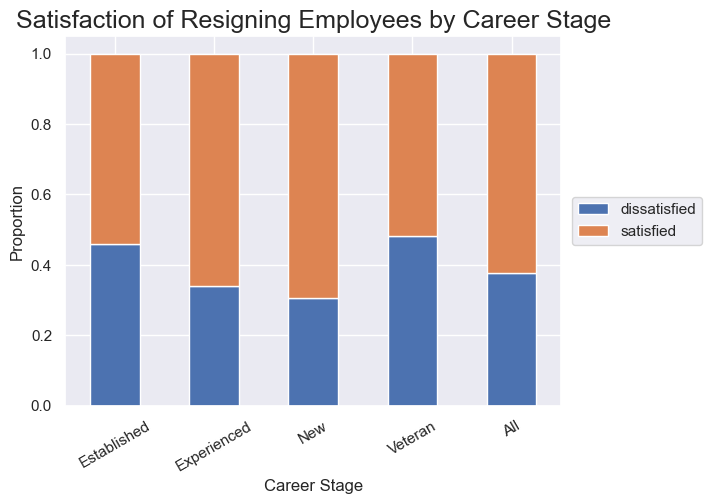

In [63]:
satisfaction_proportion_by_career_stage.plot(kind="bar", stacked=True, rot=30)

plt.title("Satisfaction of Resigning Employees by Career Stage", fontsize=18)

plt.xlabel("Career Stage")

plt.ylabel("Proportion")

plt.legend(loc="right", bbox_to_anchor=(1.3, 0.5))

plt.show()

We can conclude that resigning employees that are nearer the start of their career (`New` and `Experienced`) are less likely cite dissatisfaction as a reason for resignation than for mid-late career employees (`Established` and `Veteran`).

This *could* be because employees who have been working in the same area for a longer period of time are more likely to become burned out or may desire further career progression opportunities beyond what the institution is able to provide. 

There are many factors that can contribute to dissatisfaction however, so this is should be taken as one of many potential explanations for the trend. 

### Aggregating by Age Group

In [64]:
combined["age_group"].value_counts(dropna=False)

age_group
40s    174
20s    139
30s    134
50s    126
NaN     55
60+     23
Name: count, dtype: int64

In [65]:
satisfaction_proportion_by_age_group = combined.pivot_table(index="age_group", values="dissatisfied", margins=True, aggfunc="mean")

satisfaction_proportion_by_age_group["satisfied"] = 1 - satisfaction_proportion_by_age_group["dissatisfied"] # calculate the proportion of satisfied employees

satisfaction_proportion_by_age_group

,dissatisfied,satisfied
age_group,,
20s,0.352518,0.647482
30s,0.358209,0.641791
40s,0.379310,0.620690
50s,0.404762,0.595238
60+,0.521739,0.478261
All,0.379195,0.620805


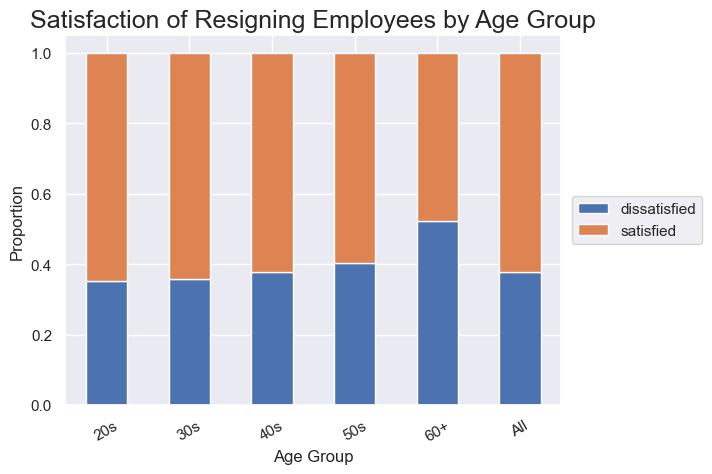

In [66]:
satisfaction_proportion_by_age_group.plot(kind="bar", stacked=True, rot=30)

plt.title("Satisfaction of Resigning Employees by Age Group", fontsize=18)

plt.xlabel("Age Group")

plt.ylabel("Proportion")

plt.legend(loc="right", bbox_to_anchor=(1.3, 0.5))

plt.show()

From these data, we can conclude of the resigning employees, the more senior employees are considerably more likely to resign with some dissatisfaction. 

Typically: 

>* Only around 35% of resigning employees in their 20s and 30s feel some sort of dissatisfaction with their working conditions. 
>
>* This steadily increases up to around 40% for employees in their 50s and then sharply jumps to **over 52%** for employees aged 60 and over.

We must be somewhat cautious however, since there are only 23 resigning employees in the dataset that have ages above 60. This is a small sample size relative to the other age groups (which all exceed 125 employees). 

It may be the sharp jump from employees aged in their 50s versus those who are 60+ is over-emphasised by the smaller sample size. Despite this, considering how there is a gradual upwards trend as the ages of employees increase, we can reasonably expect the proportion of dissatisfied resigners to be greatest in the 60+ age group.

---

## Conclusions

We have successfully prepared, combined and conducted initial analysis on two employee exit survey datasets in the domain of the Austrailian education system.

The following observations were made:

>* Resigning employees that are nearer the start of their career (`New` and `Experienced`) are less likely cite dissatisfaction as a reason for resignation than for mid-late career employees (`Established` and `Veteran`).

>* Around 35% of resigning employees in their 20s and 30s feel some sort of dissatisfaction with their working conditions. 
>
>* This steadily increases up to around 40% for employees in their 50s and then sharply jumps to **over 52%** for employees aged 60 and over.

Of the employees who decide to resign, it appears the most likely candidates for feelings of dissatisfaction with their working conditions are more senior and have been working for the institute for a great deal of time.
